Saving dataset.zip to dataset.zip
ZIP extracted successfully.
Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Class Indices (Label Mapping): {'Bear': 0, 'Panda': 1}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 340ms/step - accuracy: 0.4892 - loss: 2.1771 - val_accuracy: 0.9900 - val_loss: 0.1781
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9752 - loss: 0.1133 - val_accuracy: 1.0000 - val_loss: 0.0141
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9879 - loss: 0.0471 - val_accuracy: 0.9900 - val_loss: 0.0221
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9870 - loss: 0.0339 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 1.6283e-04


Final Training Accuracy: 1.00
Final Validation Accuracy: 1.00
 Model saved as panda_bear_classifier.h5
Upload an image to classify as Panda or Bear:


Saving photo-1599625042924-a22b68c0e39a.jpg to photo-1599625042924-a22b68c0e39a.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step


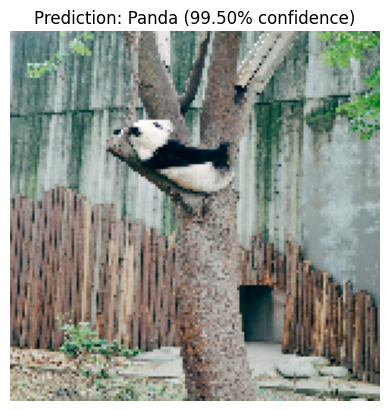

In [3]:

# Upload & Extract ZIP

from google.colab import files
import zipfile
import os

uploaded = files.upload()

# Extract the uploaded ZIP file

for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall()

print("ZIP extracted successfully.")


# Import Libraries

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Define Paths & Settings

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_dir = 'data/train'
val_dir = 'data/validation'


# Data Preprocessing

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Show class mapping

print("Class Indices (Label Mapping):", train_generator.class_indices)
class_names = list(train_generator.class_indices.keys())  # ['Bear', 'Panda'] or vice versa


# Build CNN Model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary output
])


# Compile the Model

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


# Train the Model

EPOCHS = 5
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.2f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.2f}")


# Save the Model

model.save('panda_bear_classifier.h5')
print(" Model saved as panda_bear_classifier.h5")


# Upload and Predict New Image

from tensorflow.keras.preprocessing import image

print("Upload an image to classify as Panda or Bear:")
uploaded = files.upload()

for img_name in uploaded.keys():
    img = image.load_img(img_name, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]

    # Map prediction to label correctly

    label_index = int(prediction > 0.5)
    label = class_names[label_index]
    confidence = prediction if label_index == 1 else 1 - prediction

    # Show result

    plt.imshow(img)
    plt.title(f"Prediction: {label} ({confidence*100:.2f}% confidence)")
    plt.axis('off')
    plt.show()
